In [69]:
import matplotlib.pyplot as plt
import numpy as np
import m4_helpers
from scipy.optimize import curve_fit


In [83]:
x_dim, y_dim = 40, 20
velocities = m4_helpers.m4_1(x_dim=x_dim, y_dim=y_dim, epochs=10000, omega=0.5)


In [84]:
u_aij_max = velocities[len(velocities)-1][0]
u_aij_max[0,0,:]

array([0.41666667, 0.02777778, 0.08333333, 0.13888889, 0.19444444,
       0.25      , 0.30555556, 0.36111111, 0.41666667, 0.47222222,
       0.52777778, 0.58333333, 0.63888889, 0.69444444, 0.75      ,
       0.80555556, 0.86111111, 0.91666667, 0.97222222, 0.58333333])

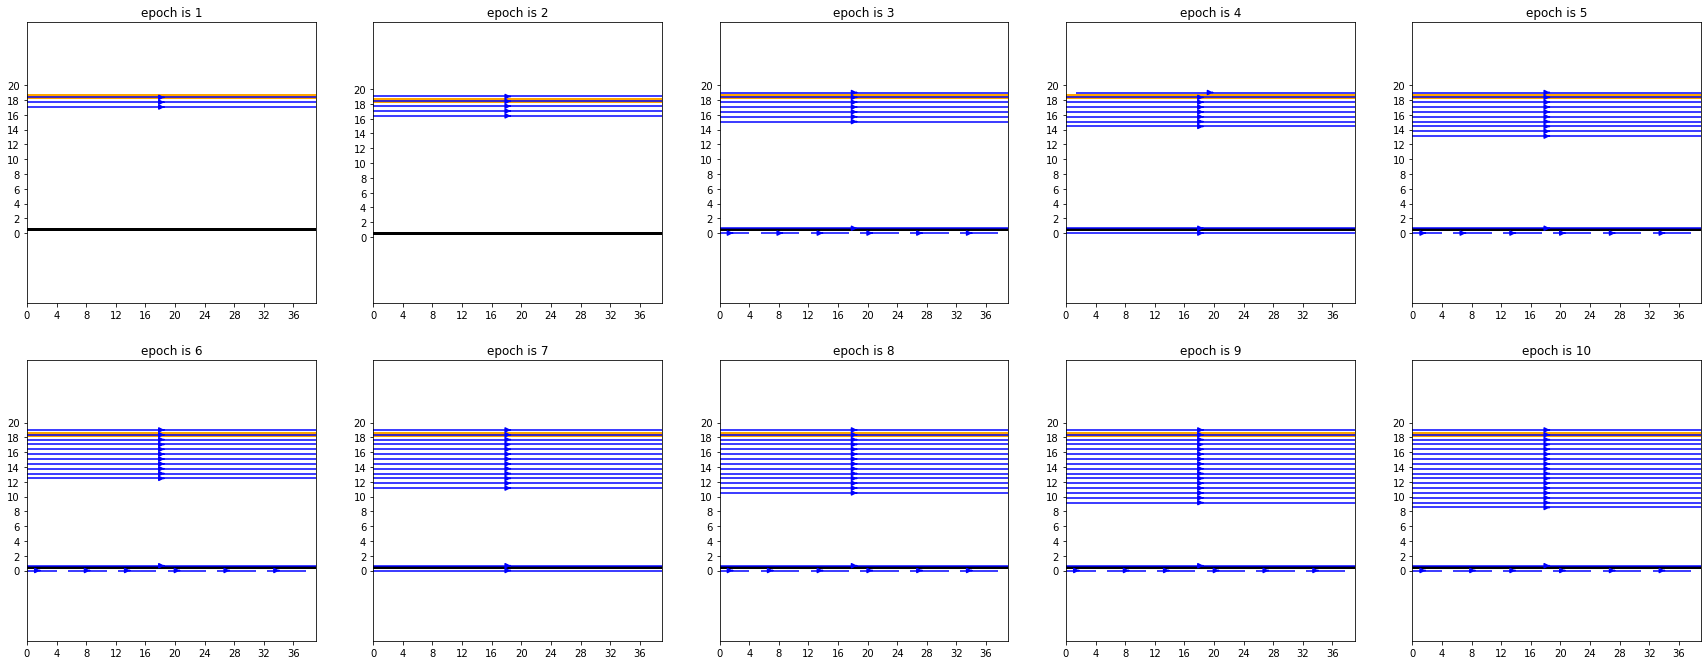

In [59]:
fig = plt.figure(figsize=(30,30))
fig = m4_helpers.m4_1_fig(fig, x_dim=x_dim, y_dim=y_dim, velocities=velocities)


# plt.close()

### We know that moving top wall is working if top particles have same velocity as wall

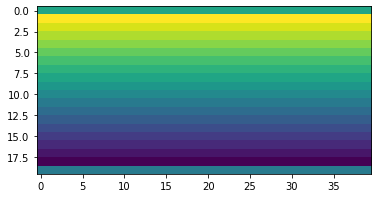

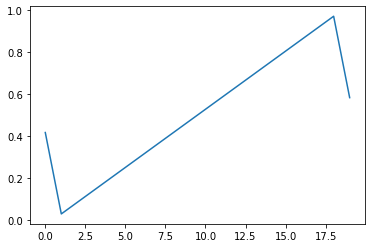

In [85]:
# plt.axis('off')
plt.imshow(np.rot90(u_aij_max[0,:,:]))
plt.show()
plt.close()


# plt.axis('off')
plt.plot(np.arange(20),u_aij_max[0,0,:])
plt.show()
plt.close()

# u_aij[0,0,:]

[9.40220124e-16 5.55555556e-02 1.11111111e-01 1.66666667e-01
 2.22222222e-01 2.77777778e-01 3.33333333e-01 3.88888889e-01
 4.44444444e-01 5.00000000e-01 5.55555556e-01 6.11111111e-01
 6.66666667e-01 7.22222222e-01 7.77777778e-01 8.33333333e-01
 8.88888889e-01 9.44444444e-01 1.00000000e+00]


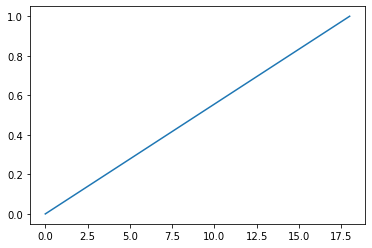

In [100]:
def func(x, a, b):
    return a * x + b
popt, pcov = curve_fit(func, np.arange(20-2)+1, u_aij_max[0,0,1:-1])
# print(popt[1])
# print(popt[0])
vel_clean = popt[0]*(np.arange(20-1) + 0.5) + popt[1]
print(vel_clean)
plt.plot(np.arange(20-1), vel_clean)

# Reynoldsnumber
Divides the stable and unstable purturbations like turbulance.

If larger than 1 the system could show instability and turbulance.

For sliding lid in most work choose a reynoldsnumber ~1000. 

- Gives idea of what our outcome should look like.
- use 300 grid points as $R_e = 340/10 * l = 3.4 * 300 = 1000$ (theoretically derived with certrain omega)

Re is indicator that I am in the flow regime where simulation conforms to "normal" circumstances


# Diffusion constant phi

Set to 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
phi = np.zeros(100)
phi[49] = 1.
D = 1.0
dx = 1.
dt = 0.1
phi0 = phi

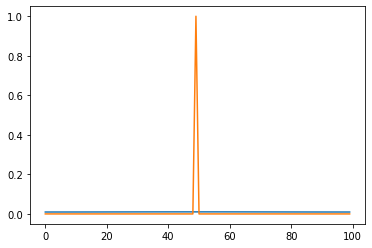

In [33]:
for i in range (10000):
    phi = phi + D*dt/dx**2*(np.roll(phi,1)-2.*phi+np.roll(phi,-1))
plt.plot(phi)
plt.plot(phi0)

Function still retains Gausian like distribution, but its super low.

15.625